In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
articles = pd.read_excel("data.xlsx").set_index('article_id')

In [15]:
articles.to_excel('dataset.xlsx')

In [ ]:
articles['product_name'].unique()

In [16]:
articles

,product_name,product_type_number,product_group_name,graphical_appearance_number,colour_group_code,perceived_colour_value_id,perceived_colour_master_id,department_number,index_name,index_group_number,section_number,garment_group_number
article_id,,,,,,,,,,,,
108775015,Strap top,17,Garment Upper body,9,9,4,5,4,Ladieswear,1,2,1
108775044,Strap top,17,Garment Upper body,9,10,3,9,4,Ladieswear,1,2,1
108775051,Strap top (1),17,Garment Upper body,10,11,1,9,4,Ladieswear,1,2,1
110065001,OP T-shirt (Idro),33,Underwear,9,9,4,5,2,Lingeries/Tights,1,14,8
110065002,OP T-shirt (Idro),33,Underwear,9,10,3,9,2,Lingeries/Tights,1,14,8
...,...,...,...,...,...,...,...,...,...,...,...,...
219075014,Billy cargo pants,23,Garment Lower body,9,8,4,12,20,Menswear,3,3,5
219075017,Billy cargo pants,23,Garment Lower body,9,19,4,20,20,Menswear,3,3,5
219075021,Billy cargo pants,23,Garment Lower body,9,9,4,5,20,Menswear,3,3,5


In [17]:
#print(articles['product_name'].unique())
print(articles['product_group_name'].unique())
print(articles['index_name'].unique())

['Garment Upper body' 'Underwear' 'Socks & Tights' 'Garment Lower body'
 'Accessories' 'Items' 'Nightwear' 'Unknown' 'Underwear/nightwear' 'Shoes'
 'Swimwear' 'Garment Full body']
['Ladieswear' 'Lingeries/Tights' 'Baby Sizes 50-98' 'Menswear'
 'Ladies Accessories' 'Sport' 'Children Sizes 92-140' 'Divided'
 'Children Sizes 134-170']


In [18]:
prod_name_enc = LabelEncoder()
group_name_enc = LabelEncoder()
index_enc = LabelEncoder()

articles['product_name'] = prod_name_enc.fit_transform(articles['product_name'])
articles['product_group_name'] = group_name_enc.fit_transform(articles['product_group_name'])
articles['index_name'] = index_enc.fit_transform(articles['index_name'])

In [19]:
article_vectors = articles.values
article_ids = articles.index.values
print(article_vectors.shape)
print(article_ids.shape)

(321, 12)
(321,)


In [20]:
article_data = {"id": article_ids, "vector": article_vectors}

In [32]:
class CosineSimilarityIndex():
    def __init__(self, article_vectors, labels):
        self.article_vectors = article_vectors.astype('float32')
        self.labels = labels
        
    def query(self, vector, k=5):
        similarities = cosine_similarity([vector], self.article_vectors).flatten()
        indices = similarities.argsort()[::-1][:k]
        return [self.labels[i] for i in indices]

In [33]:
index = CosineSimilarityIndex(article_data['vector'], article_data['id'])

In [34]:
index

In [35]:
similar_items_dict = {"item": [], "similar_items": []}
for x in range(len(article_data['vector'])):
    similar_items = index.query(article_data['vector'][x])
    similar_items_dict['item'].append(article_data['id'][x])
    similar_items_dict['similar_items'].append([item for item in similar_items if item != article_data['id'][x]])
similarities_df = pd.DataFrame(similar_items_dict)

In [36]:
similarities_df

,item,similar_items
0,108775015,"[108775044, 108775051, 189616001, 202017055]"
1,108775044,"[108775051, 108775015, 202017055, 189616001]"
2,108775051,"[108775044, 108775015, 202017055, 189616001]"
3,110065001,"[153115019, 110065002, 153115021, 110065011]"
4,110065002,"[153115021, 110065011, 153115020, 153115019]"
...,...,...
316,219075014,"[219075028, 219075021, 190252020, 212766045]"
317,219075017,"[219075023, 219075028, 212766041, 219075014]"
318,219075021,"[219075014, 219075028, 190252020, 212766043]"
319,219075023,"[219075017, 219075028, 212766041, 219075014]"


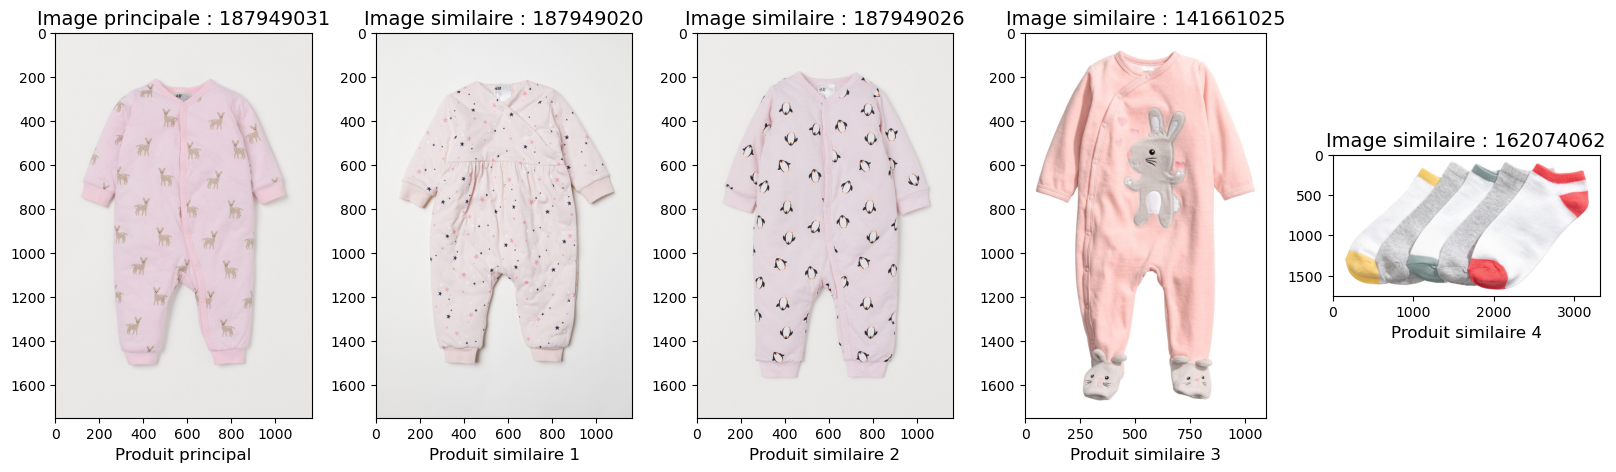

In [37]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 158

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

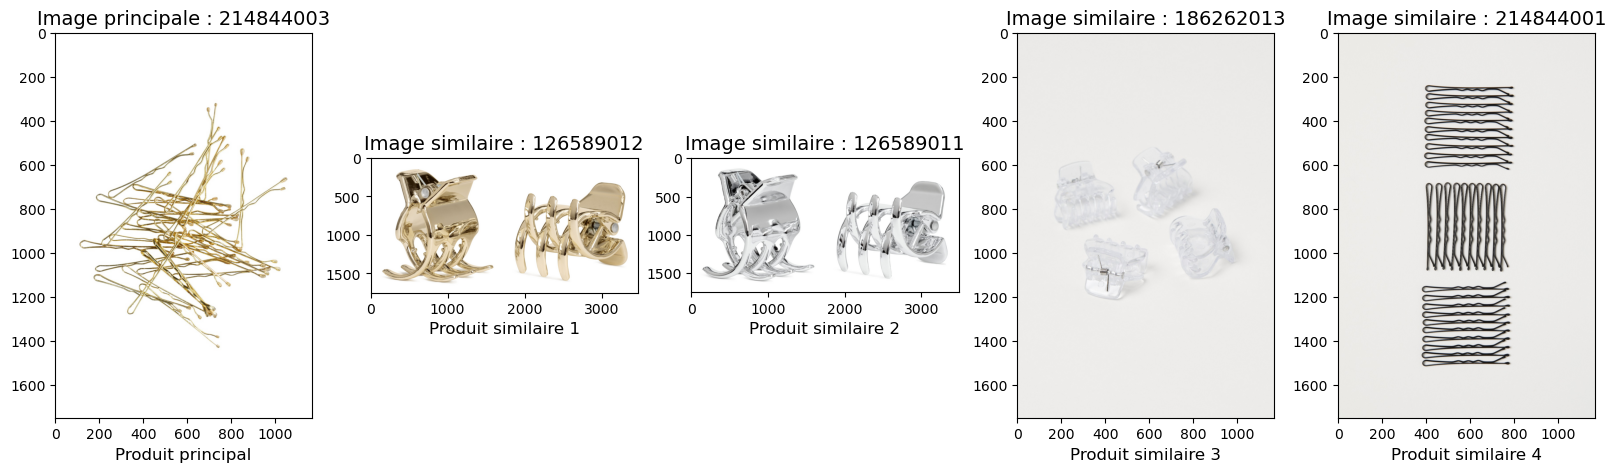

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 284

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

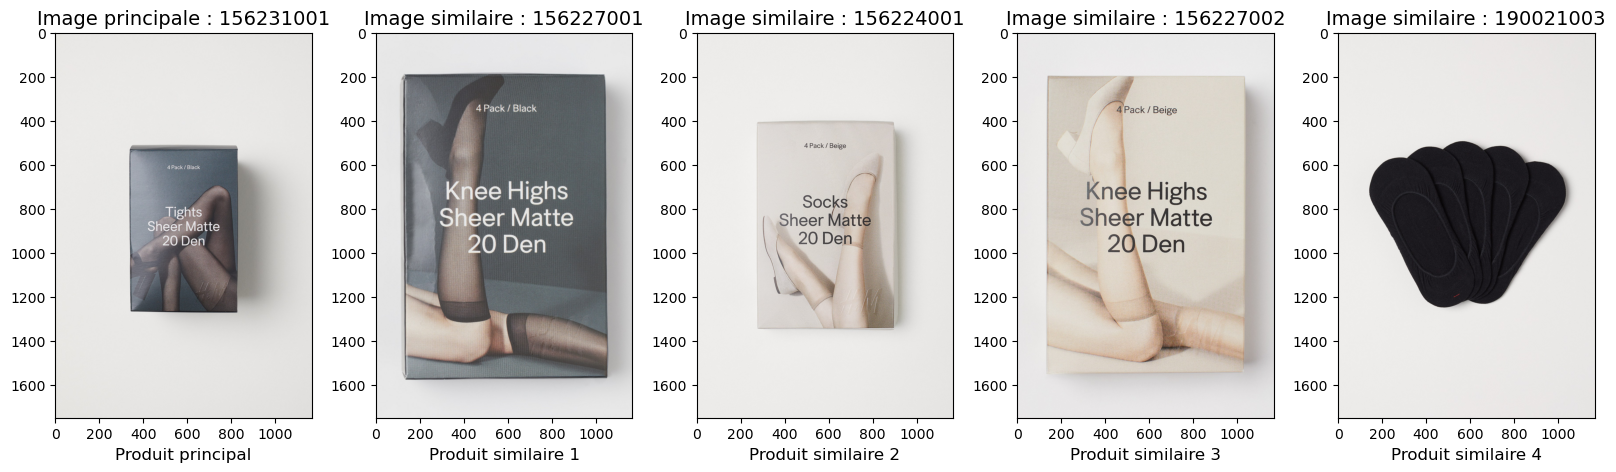

In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 67

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

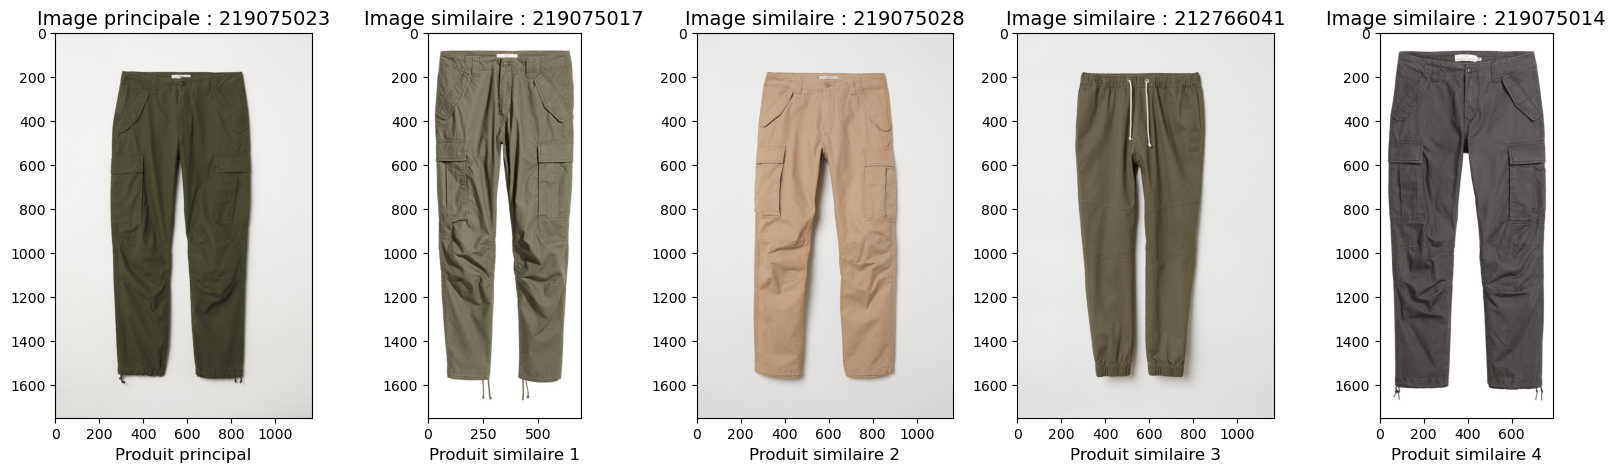

In [29]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 319

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

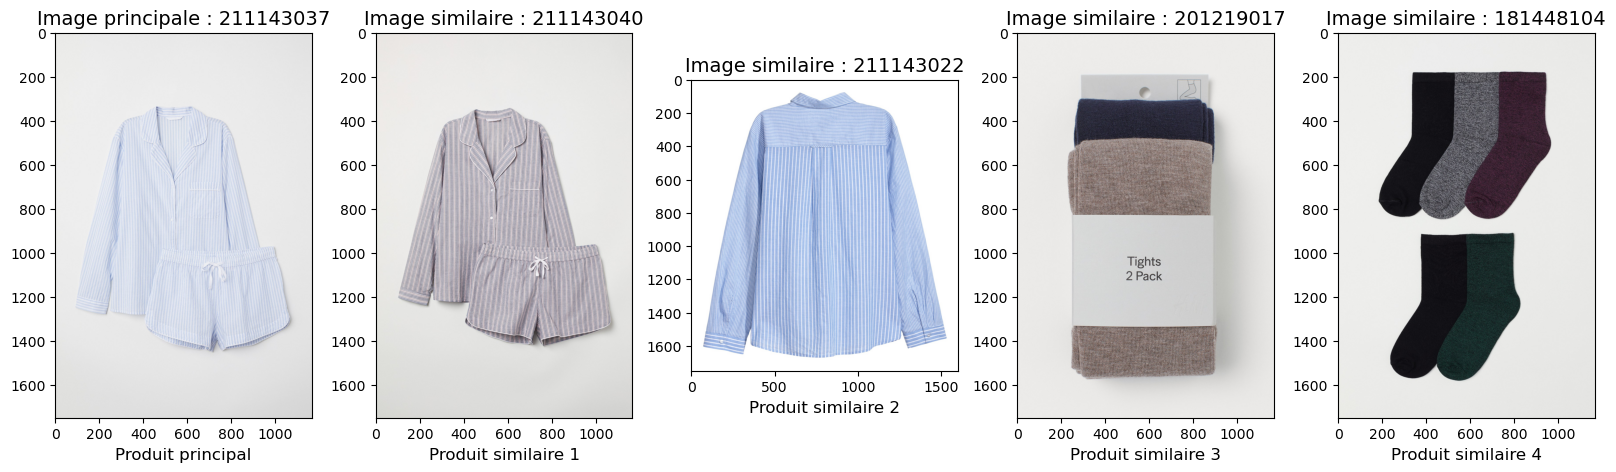

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

index = 255

img_path = "images/0" + str(similarities_df.loc[index, 'item']) + ".jpg"
img = mpimg.imread(img_path)

fig = plt.figure(figsize=(20, 5))

ax1 = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, 1)
ax1.imshow(img)
ax1.set_title('Image principale : ' + str(similarities_df.loc[index, 'item']), fontsize=14)
ax1.set_xlabel('Produit principal', fontsize=12)

for i, sim_item in enumerate(similarities_df.loc[index, 'similar_items']):
    sim_img_path = "images/0" + str(sim_item) + ".jpg"
    sim_img = mpimg.imread(sim_img_path)
    ax = fig.add_subplot(1, len(similarities_df.loc[index, 'similar_items'])+1, i+2)
    ax.imshow(sim_img)
    ax.set_title('Image similaire : ' + str(sim_item), fontsize=14)
    ax.set_xlabel('Produit similaire ' + str(i+1), fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()